In [438]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 10)

### Data processing

In [439]:
filenames = ['conflicts', 'branches', 'wall_time', 'status', 'obj_value']
ORTOOLS_PATH = 'data/statistics/ortools/'
SPROLOG_PATH = 'data/statistics/prolog/'
DOCPLEX_PATH = 'data/statistics/docplex/'

ortools_files = [open(ORTOOLS_PATH + filename + '.txt') for filename in filenames]
sprolog_files = [open(SPROLOG_PATH + filename + '.txt') for filename in filenames]
docplex_files = [open(DOCPLEX_PATH + filename + '.txt') for filename in filenames]

tests = ['n_jobs', 'percent_alt_jobs',
         'n_machines', 'percent_alt_machines',
         'avg_task_size', 'production_range',
         'time_usage', 'over_time_hours',
         'time_out']


In [440]:
test_info = {}
for test in tests:
    test_info[test] = {}

for ortools_file, sprolog_file, docplex_file, filename in zip(ortools_files, sprolog_files, docplex_files, filenames):
    for test in tests:
        test_info[test]['ortools_' + filename] = ortools_file.readline().strip('\n').split(',')[1:]
        test_info[test]['sprolog_' + filename] = sprolog_file.readline().strip('\n').split(',')[1:]
        test_info[test]['docplex_' + filename] = docplex_file.readline().strip('\n').split(',')[1:]

for test in tests:
    test_info[test] = pd.DataFrame.from_dict(test_info[test])



In [441]:
test_info['n_jobs']['n_jobs'] = [2, 5, 10, 20, 40, 60, 80, 100, 125, 150]

test_info['percent_alt_jobs']['percent_alt_jobs'] = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

test_info['n_machines']['n_machines'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

test_info['percent_alt_machines']['percent_alt_machines'] = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

test_info['avg_task_size']['avg_task_size'] = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1250, 1500, 2000, 2500]

test_info['production_range']['production_range'] = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20]

test_info['time_usage']['time_usage'] = [50, 60, 70, 80, 90, 100]

test_info['over_time_hours']['over_time_hours'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

test_info['time_out']['time_out'] = list(range(1,300+1))

In [442]:
n_jobs_conflicts = test_info['n_jobs'][['n_jobs', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
n_jobs_branches  = test_info['n_jobs'][['n_jobs', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
n_jobs_wall_time = test_info['n_jobs'][['n_jobs', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
n_jobs_status    = test_info['n_jobs'][['n_jobs', 'ortools_status', 'sprolog_status', 'docplex_status']]
n_jobs_obj_value = test_info['n_jobs'][['n_jobs', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

percent_alt_jobs_conflicts = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
percent_alt_jobs_branches  = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
percent_alt_jobs_wall_time = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
percent_alt_jobs_status    = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_status', 'sprolog_status', 'docplex_status']]
percent_alt_jobs_obj_value = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

n_machines_conflicts = test_info['n_machines'][['n_machines', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
n_machines_branches  = test_info['n_machines'][['n_machines', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
n_machines_wall_time = test_info['n_machines'][['n_machines', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
n_machines_status    = test_info['n_machines'][['n_machines', 'ortools_status', 'sprolog_status', 'docplex_status']]
n_machines_obj_value = test_info['n_machines'][['n_machines', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

percent_alt_machines_conflicts = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
percent_alt_machines_branches  = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
percent_alt_machines_wall_time = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
percent_alt_machines_status    = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_status', 'sprolog_status', 'docplex_status']]
percent_alt_machines_obj_value = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

avg_task_size_conflicts = test_info['avg_task_size'][['avg_task_size', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
avg_task_size_branches  = test_info['avg_task_size'][['avg_task_size', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
avg_task_size_wall_time = test_info['avg_task_size'][['avg_task_size', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
avg_task_size_status    = test_info['avg_task_size'][['avg_task_size', 'ortools_status', 'sprolog_status', 'docplex_status']]
avg_task_size_obj_value = test_info['avg_task_size'][['avg_task_size', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

production_range_conflicts = test_info['production_range'][['production_range', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
production_range_branches  = test_info['production_range'][['production_range', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
production_range_wall_time = test_info['production_range'][['production_range', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
production_range_status    = test_info['production_range'][['production_range', 'ortools_status', 'sprolog_status', 'docplex_status']]
production_range_obj_value = test_info['production_range'][['production_range', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

time_usage_conflicts = test_info['time_usage'][['time_usage', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
time_usage_branches  = test_info['time_usage'][['time_usage', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
time_usage_wall_time = test_info['time_usage'][['time_usage', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
time_usage_status    = test_info['time_usage'][['time_usage', 'ortools_status', 'sprolog_status', 'docplex_status']]
time_usage_obj_value = test_info['time_usage'][['time_usage', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

over_time_hours_conflicts = test_info['over_time_hours'][['over_time_hours', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
over_time_hours_branches  = test_info['over_time_hours'][['over_time_hours', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
over_time_hours_wall_time = test_info['over_time_hours'][['over_time_hours', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
over_time_hours_status    = test_info['over_time_hours'][['over_time_hours', 'ortools_status', 'sprolog_status', 'docplex_status']]
over_time_hours_obj_value = test_info['over_time_hours'][['over_time_hours', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

time_out_conflicts = test_info['time_out'][['time_out', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
time_out_branches  = test_info['time_out'][['time_out', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
time_out_wall_time = test_info['time_out'][['time_out', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
time_out_status    = test_info['time_out'][['time_out', 'ortools_status', 'sprolog_status', 'docplex_status']]
time_out_obj_value = test_info['time_out'][['time_out', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]


In [443]:
time_out_branches

,time_out,ortools_branches,sprolog_branches,docplex_branches
0,1,1088,_6024965,3144
1,2,2119,_6817229,3144
2,3,1066,_4794917,3144
3,4,1515,_5230981,3144
4,5,2053,_6023245,3144
...,...,...,...,...
295,296,3466,_5348581,3144
296,297,1506,_6140845,3144
297,298,1498,_6933109,3144
298,299,1537,_4892605,3144


In [444]:
status_replacements = {'success': 'FEASIBLE', 'Optimal': 'OPTIMAL', 'optimality': 'OPTIMAL', 'time_out': 'TIMED OUT'}

# Graphs

## Number of Jobs

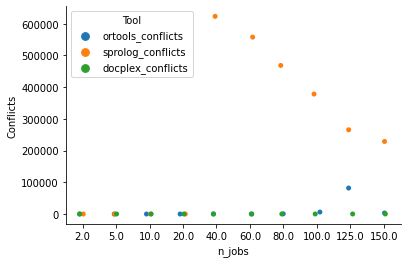

In [445]:
# conflicts
df = n_jobs_conflicts.astype(float)

sns_df = df.melt('n_jobs', var_name='Tool', value_name='Conflicts')

sns.stripplot(x='n_jobs', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

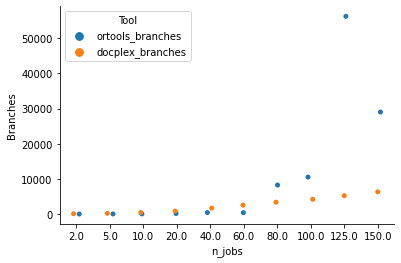

In [446]:
# branches
df = n_jobs_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('n_jobs', var_name='Tool', value_name='Branches')

sns.stripplot(x='n_jobs', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

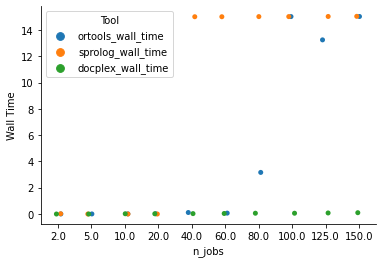

In [447]:
# wall time
df = n_jobs_wall_time.astype(float)

sns_df = df.melt('n_jobs', var_name='Tool', value_name='Wall Time')

sns.stripplot(x='n_jobs', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

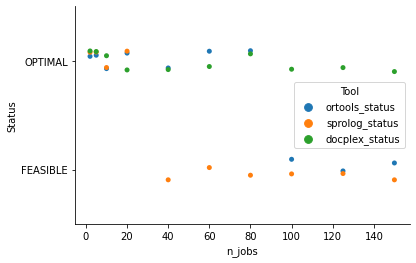

In [448]:
# status
df = n_jobs_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('n_jobs', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="n_jobs", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

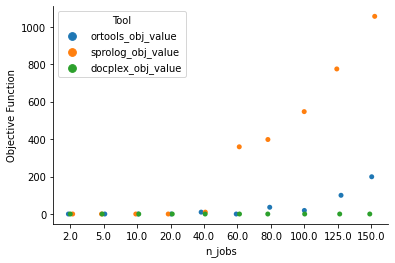

In [449]:
# objective value
df = n_jobs_obj_value.astype(float)

sns_df = df.melt('n_jobs', var_name='Tool', value_name='Objective Function')

sns.stripplot(x='n_jobs', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Percentage of Alternative Jobs 

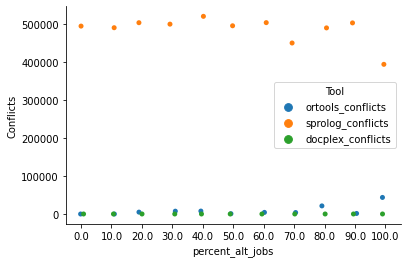

In [450]:
# conflicts
df = percent_alt_jobs_conflicts.astype(float)

sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Conflicts')

sns.stripplot(x='percent_alt_jobs', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

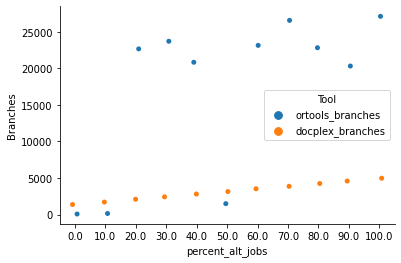

In [451]:
# branches
df = percent_alt_jobs_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Branches')

sns.stripplot(x='percent_alt_jobs', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

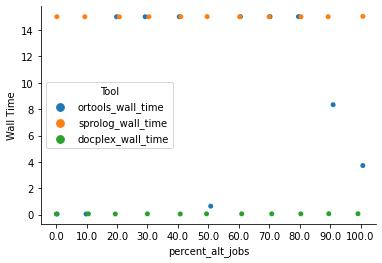

In [452]:
# wall time
df = percent_alt_jobs_wall_time.astype(float)

sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Wall Time')

sns.stripplot(x='percent_alt_jobs', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

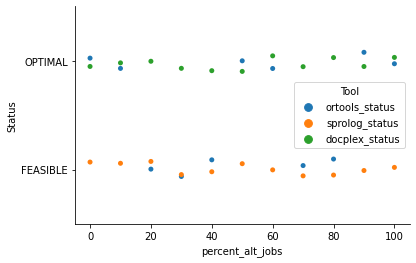

In [453]:
# status
df = percent_alt_jobs_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="percent_alt_jobs", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

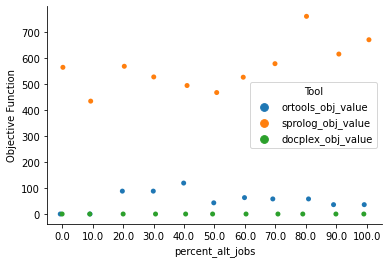

In [454]:
# objective value
df = percent_alt_jobs_obj_value.astype(float)

sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Objective Function')

sns.stripplot(x='percent_alt_jobs', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Number of Machines

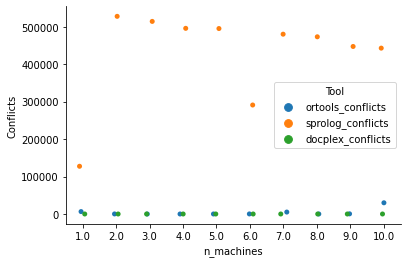

In [455]:
# conflicts
df = n_machines_conflicts.astype(float)

sns_df = df.melt('n_machines', var_name='Tool', value_name='Conflicts')

sns.stripplot(x='n_machines', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

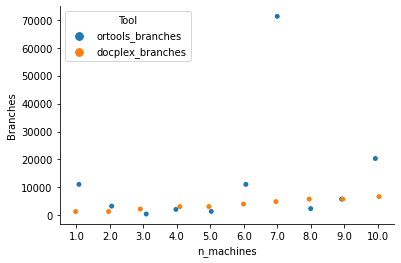

In [456]:
# branches
df = n_machines_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('n_machines', var_name='Tool', value_name='Branches')

sns.stripplot(x='n_machines', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

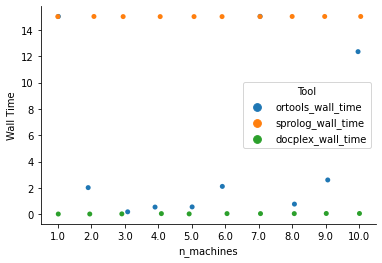

In [457]:
# wall time
df = n_machines_wall_time.astype(float)

sns_df = df.melt('n_machines', var_name='Tool', value_name='Wall Time')

sns.stripplot(x='n_machines', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

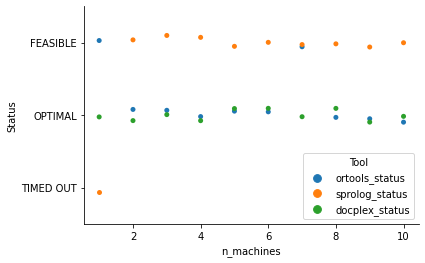

In [458]:
# status
df = n_machines_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('n_machines', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="n_machines", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

C:\Users\joaos\AppData\Local\Temp\ipykernel_1200\879614856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_machines_obj_value['sprolog_obj_value'] = n_machines_obj_value['sprolog_obj_value'].replace(' _1857133', np.NaN)


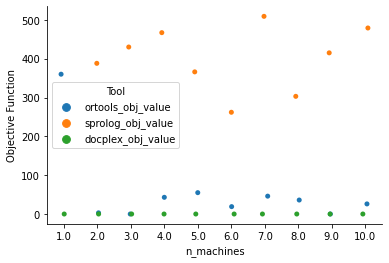

In [459]:
# objective value
n_machines_obj_value['sprolog_obj_value'] = n_machines_obj_value['sprolog_obj_value'].replace(' _1857133', np.NaN)

df = n_machines_obj_value.astype(float)

sns_df = df.melt('n_machines', var_name='Tool', value_name='Objective Function')

sns.stripplot(x='n_machines', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Percentage of Alternative Machines

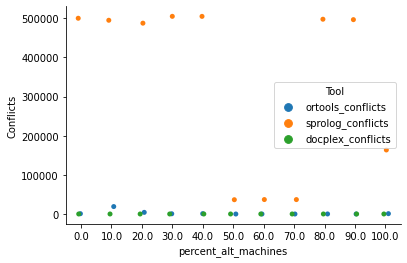

In [460]:
# conflicts
df = percent_alt_machines_conflicts.astype(float)

sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Conflicts')

sns.stripplot(x='percent_alt_machines', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

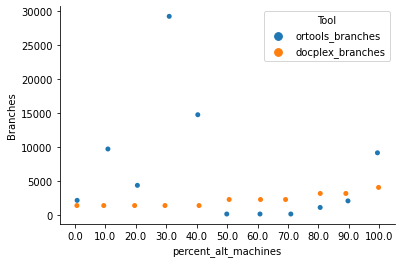

In [461]:
# branches
df = percent_alt_machines_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Branches')

sns.stripplot(x='percent_alt_machines', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

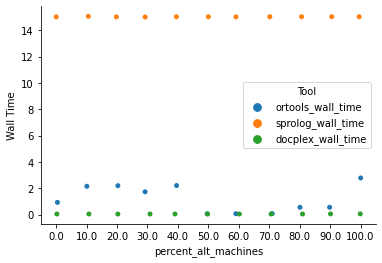

In [462]:
# wall time
df = percent_alt_machines_wall_time.astype(float)

sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Wall Time')

sns.stripplot(x='percent_alt_machines', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

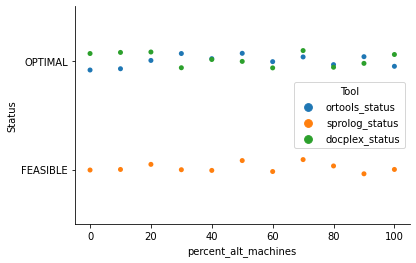

In [463]:
# status
df = percent_alt_machines_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="percent_alt_machines", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

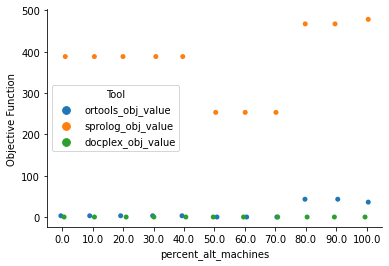

In [464]:
# objective value
df = percent_alt_machines_obj_value.astype(float)

sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Objective Function')

sns.stripplot(x='percent_alt_machines', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Average Size Task

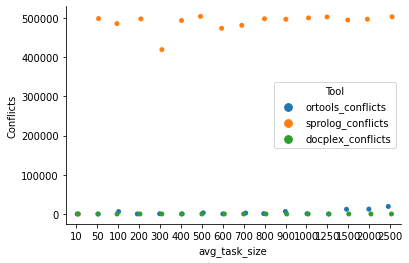

In [465]:
# conflicts
df = avg_task_size_conflicts.astype(int)

sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Conflicts')

sns.stripplot(x='avg_task_size', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

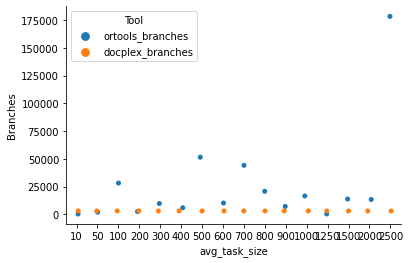

In [466]:
# branches
df = avg_task_size_branches.drop(labels='sprolog_branches', axis=1).astype(int)

sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Branches')

sns.stripplot(x='avg_task_size', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

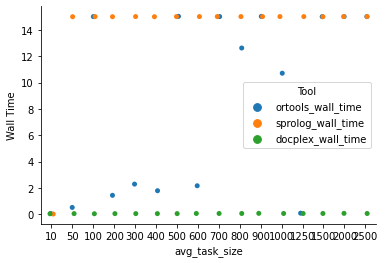

In [467]:
# wall time
df = avg_task_size_wall_time.astype(float)
df['avg_task_size'] = df['avg_task_size'].astype(int)
sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Wall Time')

sns.stripplot(x='avg_task_size', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

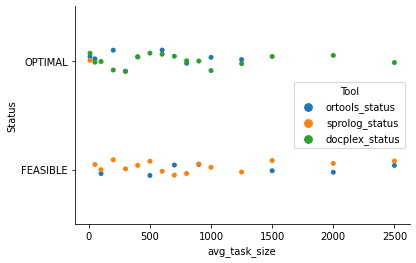

In [468]:
# status
df = avg_task_size_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="avg_task_size", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

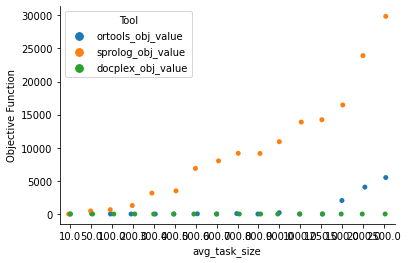

In [469]:
# objective value
df = avg_task_size_obj_value.astype(float)

sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Objective Function')

sns.stripplot(x='avg_task_size', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Production Range

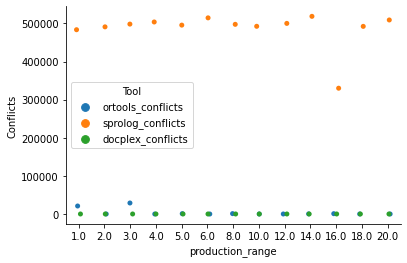

In [470]:
# conflicts
df = production_range_conflicts.astype(float)

sns_df = df.melt('production_range', var_name='Tool', value_name='Conflicts')

sns.stripplot(x='production_range', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

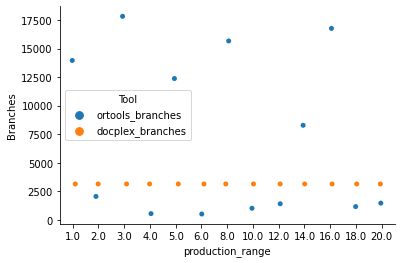

In [471]:
# branches
df = production_range_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('production_range', var_name='Tool', value_name='Branches')

sns.stripplot(x='production_range', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

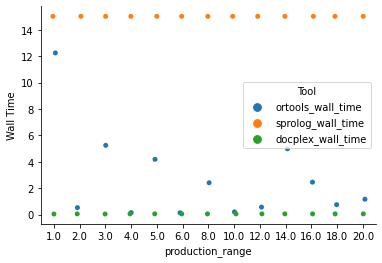

In [472]:
# wall time
df = production_range_wall_time.astype(float)

sns_df = df.melt('production_range', var_name='Tool', value_name='Wall Time')

sns.stripplot(x='production_range', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

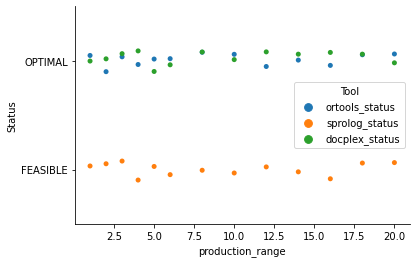

In [473]:
# status
df = production_range_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('production_range', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="production_range", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

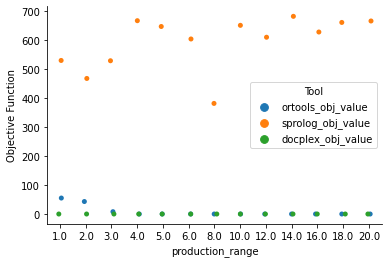

In [474]:
# objective value
df = production_range_obj_value.astype(float)

sns_df = df.melt('production_range', var_name='Tool', value_name='Objective Function')

sns.stripplot(x='production_range', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Time Usage

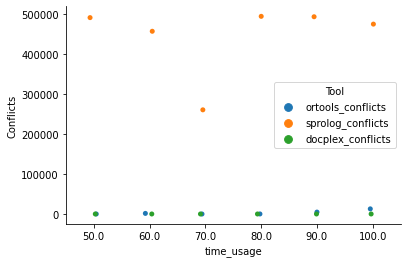

In [475]:
# conflicts
df = time_usage_conflicts.astype(float)

sns_df = df.melt('time_usage', var_name='Tool', value_name='Conflicts')

sns.stripplot(x='time_usage', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

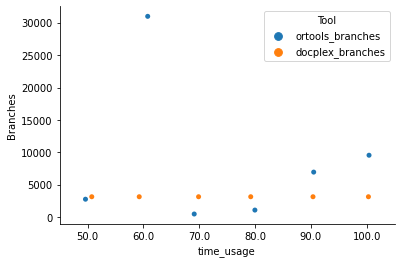

In [476]:
# branches
df = time_usage_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('time_usage', var_name='Tool', value_name='Branches')

sns.stripplot(x='time_usage', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

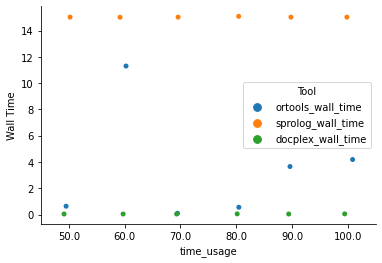

In [477]:
# wall time
df = time_usage_wall_time.astype(float)

sns_df = df.melt('time_usage', var_name='Tool', value_name='Wall Time')

sns.stripplot(x='time_usage', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

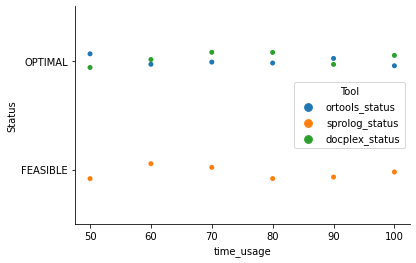

In [478]:
# status
df = time_usage_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('time_usage', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="time_usage", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

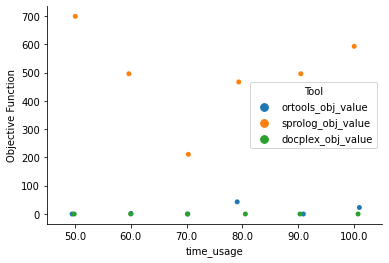

In [479]:
# objective value
df = time_usage_obj_value.astype(float)

sns_df = df.melt('time_usage', var_name='Tool', value_name='Objective Function')

sns.stripplot(x='time_usage', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Overtime Hours

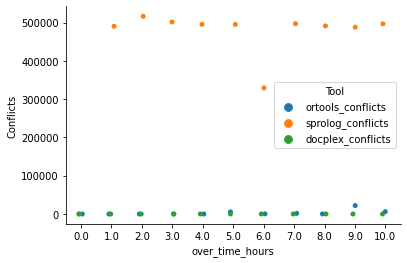

In [480]:
# conflicts
df = over_time_hours_conflicts.astype(float)

# ax = df.plot(y=['ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts'])
# ax.set_xlabel("Overtime (in hours)")
# ax.set_ylabel("Number of Conflicts")
# ax.legend(["OR-Tools", "SICStus", "DOcplex"])

sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Conflicts')

sns.stripplot(x='over_time_hours', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

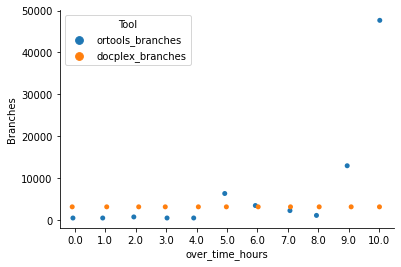

In [481]:
# branches
df = over_time_hours_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Branches')

sns.stripplot(x='over_time_hours', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

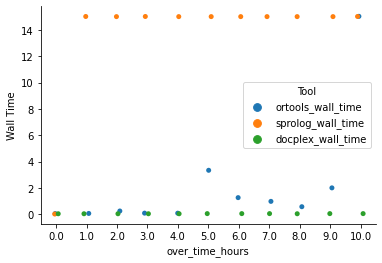

In [482]:
# wall time
df = over_time_hours_wall_time.astype(float)

sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Wall Time')

sns.stripplot(x='over_time_hours', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

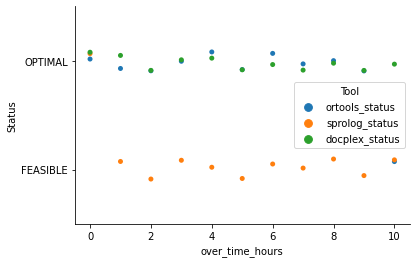

In [483]:
# status
df = over_time_hours_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="over_time_hours", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

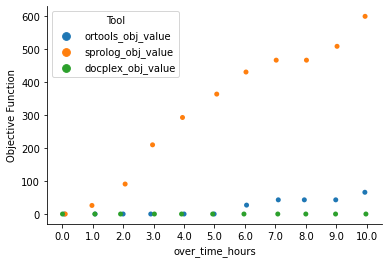

In [484]:
# objective value
df = over_time_hours_obj_value.astype(float)

sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Objective Function')

sns.stripplot(x='over_time_hours', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Timeout

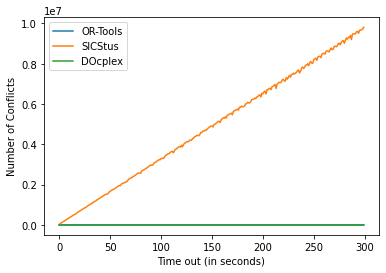

In [485]:
# conflicts
df = time_out_conflicts.astype(float)

ax = df.plot(y=['ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']) #, style=["-.", "-", "-."])
ax.set_xlabel("Time out (in seconds)")
ax.set_ylabel("Number of Conflicts")
ax.legend(["OR-Tools", "SICStus", "DOcplex"])

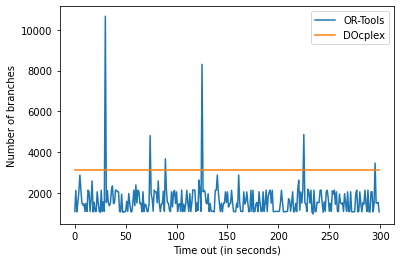

In [486]:
# branches
df = time_out_branches.drop(labels='sprolog_branches', axis=1).astype(float)

ax = df.plot(y=['ortools_branches', 'docplex_branches'])  # Prolog branches doesnt work
ax.set_xlabel("Time out (in seconds)")
ax.set_ylabel("Number of branches")
ax.legend(["OR-Tools", "DOcplex"])

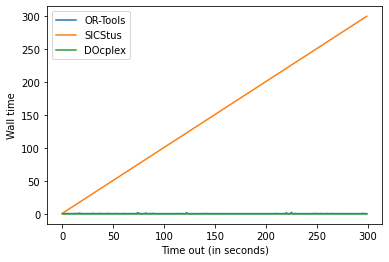

In [487]:
# wall time
df = time_out_wall_time.astype(float)

ax = df.plot(y=['ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time'])
ax.set_xlabel("Time out (in seconds)")
ax.set_ylabel("Wall time")
ax.legend(["OR-Tools", "SICStus", "DOcplex"])

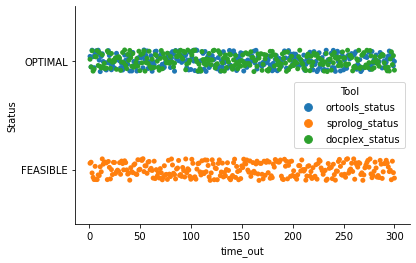

In [488]:
# status
df = time_out_status

sns_df = df.melt('time_out', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)

sns.stripplot(x="time_out", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

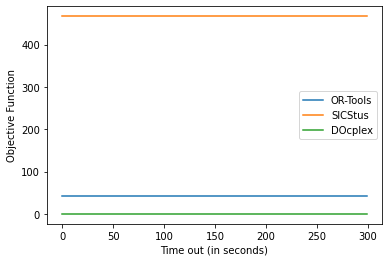

In [489]:
# objective value
df = time_out_obj_value.astype(float).astype(int)

ax = df.plot(y=['ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value'])
ax.set_xlabel("Time out (in seconds)")
ax.set_ylabel("Objective Function")
ax.legend(["OR-Tools", "SICStus", "DOcplex"])